
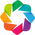

In [25]:
import holoviews as hv
import pandas as pd 
import numpy as np
import pickle

from tete import tete

from rnaseq_lib.utils import mkdir_p
from rnaseq_lib.de import get_l2fc
from rnaseq_lib.utils.tissues import return_samples

hv.extension('bokeh')

# T-ETE Plots of UCSF Gene Subset

### Input Data

In [ ]:
samples = return_samples()
normal_tissues = sorted([x for x in samples if any([y for y in samples[x] if y.endswith('11')])])

df_path = '/mnt/rna-seq-analysis/data/xena/deseq2_normalized_tcga_gtex_counts.tsv'
df = pd.read_csv(df_path, sep='\t', index_col=0)

In [5]:
gene_map = pickle.load(open('../UCSF-genes/gene_map.pickle', 'rb'))
genes = [gene_map[x.split('.')[0]] for x in df.index]
df.index = genes

ucsf_genes = sorted([x.strip() for x in open('../UCSF-genes/UCSF-RNAPanel-Final-412-genes.csv', 'r').readlines()])
ucsf_genes = [x for x in ucsf_genes if x in df.index]

df_ucsf = df.loc[ucsf_genes]
print df_ucsf.shape

(405, 18273)


### Create Scatter Objects 

In [6]:
plots = {}
for tissue in sorted(samples):
    # Subset dataframe by samples in tissue
    sub = df_ucsf[samples[tissue]]
    # Create list of labels for samples
    labels = ['Tumor' if x.endswith('-01') 
              else 'Normal' if x.endswith('-11') 
              else 'GTEx' for x in samples[tissue]]
    
    # Run t-ETE on transpose so genes are features
    z = tete(np.array(sub.T), num_dims=2, num_neighbs=20)
    
    # Create plotting dataframe for 
    plot = pd.DataFrame()
    plot['sample'] = samples[tissue]
    plot['tissue'] = [tissue for _ in samples[tissue]]
    plot['label'] = labels
    plot['x'] = z[:, 0]
    plot['y'] = z[:, 1]
    
    # Create holoviews scatter object
    scatter = hv.Scatter(plot, kdims=['x'], vdims=['y', 'label', 'sample'], group=tissue)
    plots[tissue] = scatter

## Plots

In [14]:
%%opts Scatter [width=900 height=450 tools=['hover']] 
%%opts Scatter [color_index='label'] (cmap='jet', size=5, alpha=0.5)
(plots['Adrenal'] + plots['Bladder'] + plots['Brain'] + plots['Breast'] + plots['Cervix'] + \
plots['Colon-Small_intestine'] + plots['Esophagus'] + plots['Kidney'] + plots['Liver'] + \
plots['Lung'] + plots['Ovary'] + plots['Pancreas'] + plots['Prostate'] + plots['Skin-Head'] + \
plots['Stomach'] + plots['Testis'] + plots['Thyroid'] + plots['Uterus']).cols(1)

:Layout
   .Adrenal.I                            :Scatter   [x]   (y,label,sample)
   .Bladder.I                            :Scatter   [x]   (y,label,sample)
   .Brain.I                              :Scatter   [x]   (y,label,sample)
   .Breast.I                             :Scatter   [x]   (y,label,sample)
   .Cervix.I                             :Scatter   [x]   (y,label,sample)
   .Colon_hyphen_minus_Small_intestine.I :Scatter   [x]   (y,label,sample)
   .Esophagus.I                          :Scatter   [x]   (y,label,sample)
   .Kidney.I                             :Scatter   [x]   (y,label,sample)
   .Liver.I                              :Scatter   [x]   (y,label,sample)
   .Lung.I                               :Scatter   [x]   (y,label,sample)
   .Ovary.I                              :Scatter   [x]   (y,label,sample)
   .Pancreas.I                           :Scatter   [x]   (y,label,sample)
   .Prostate.I                           :Scatter   [x]   (y,label,sample)
   .Skin_hyphen_minus_Head.I             :Scatter   [x]   (y,label,sample)
   .Stomach.I                            :Scatter   [x]   (y,label,sample)
   .Testis.I                             :Scatter   [x]   (y,label,sample)
   .Thyroid.I                            :Scatter   [x]   (y,label,sample)
   .Uterus.I                             :Scatter   [x]   (y,label,sample)

# Tissues of "Good Fit"

In [ ]:
plots = {}
for nn in [10, 20, 30, 40, 50]:
    print 'Testing {} Number of Neighbors'.format(nn)
    # Create list of labels for samples
    labels, tissues, sample_list = [], [], []
    tissue_set = ['Adrenal', 'Bladder', 'Brain', 'Breast', 'Kidney', 'Liver', 'Lung', 'Thyroid']
    for tissue in sorted(tissue_set):
        labels.extend(['Tumor' if x.endswith('-01') 
                  else 'Normal' if x.endswith('-11') 
                  else 'GTEx' for x in samples[tissue]])
        sample_list.extend([x for x in samples[tissue]])
        tissues.extend([tissue for _ in samples[tissue]])

    # Subset dataframe
    sub = df_ucsf[sample_list]

    # Run t-ETE          
    z = tete(np.array(sub.T), num_dims=2, num_neighbs=20)
    
    # Create plotting object
    plot = pd.DataFrame()
    plot['sample'] = sub.columns
    plot['tissue'] = tissues
    plot['label'] = labels
    plot['x'] = z[:, 0]
    plot['y'] = z[:, 1]

    # Create scatter object
    scatter = hv.Scatter(plot, kdims=['x'], vdims=['y', 'tissue', 'sample'], group='TCGA and GTEx')
    plots[nn] = scatter

Testing 10 Number of Neighbors
Testing 20 Number of Neighbors
Testing 50 Number of Neighbors


In [32]:
%%opts Scatter [width=900 height=450 tools=['hover']] 
%%opts Scatter [color_index='tissue'] (cmap='Set1', size=5, alpha=0.5)
%%opts Scatter [legend_position='left' show_legend=True]
plots[30]

:Scatter   [x]   (y,tissue,sample)